In [5]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("car_data.csv", index_col = 'Unnamed: 0') # Importing the data
pd.set_option('display.max_columns', 500)

In [7]:
df.head() # Probing the data

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price
0,2015 Toyota Etios,Manual,CROSS 1.4 GD Manual,"80,605 km",1st Owner,Diesel,Rohtak,"₹4,01,599"
1,2013 Honda Amaze,Manual,1.5 SMT I DTEC Manual,"82,877 km",3rd Owner,Diesel,Rohtak,"₹2,81,899"
2,2017 Maruti Swift,Manual,VXI Manual,"46,758 km",1st Owner,Petrol,Rohtak,"₹4,78,599"
3,2017 Skoda Rapid,Automatic,1.5 TDI AT STYLE PLUS Automatic,"1,38,467 km",1st Owner,Diesel,Rohtak,"₹6,10,599"
4,2018 Maruti Baleno,Manual,ZETA 1.2 K12 Manual,"9,483 km",2nd Owner,Petrol,Rohtak,"₹6,15,199"


In [8]:
df.replace(',','', regex=True, inplace=True) # Replacing the transmission type from name as we already have it
df['Variant'] = df['Variant'].str.replace('Manual', '')
df['Variant'] = df['Variant'].str.replace('Automatic', '')

In [9]:
df.tail()

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price
3995,2014 Hyundai Xcent,Manual,K8 6 STR,18957 km,2nd Owner,Petrol,Mysore,₹319399
3996,2018 Maruti Swift,Manual,XZ+ 1.2,40061 km,2nd Owner,Petrol,Mysore,₹468099
3997,2015 Honda City,Manual,1.2 TREND,15680 km,1st Owner,Petrol,Mysore,₹502799
3998,2019 KIA SELTOS,Automatic,K8 6 STR,116043 km,1st Owner,Petrol,Mysore,₹541799
3999,2017 Volkswagen Polo,Automatic,VDI AMT,66079 km,1st Owner,Petrol,Mysore,₹547399


In [10]:
df.shape # We have 5339 rows and 8 coulmns

(4000, 8)

In [11]:
df.info() # Basic info about data types, we will need to convert some of them to integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               4000 non-null   object
 1   Transmission type  3899 non-null   object
 2   Variant            4000 non-null   object
 3   Mileage            4000 non-null   object
 4   Owned              4000 non-null   object
 5   Fuel type          4000 non-null   object
 6   City               4000 non-null   object
 7   Price              4000 non-null   object
dtypes: object(8)
memory usage: 281.2+ KB


In [12]:
df.nunique() # Unique values in each column

Name                  410
Transmission type       2
Variant               517
Mileage              2385
Owned                   5
Fuel type               4
City                   19
Price                2064
dtype: int64

In [13]:
df.isnull().sum() # Some value in transmission type are missing

Name                   0
Transmission type    101
Variant                0
Mileage                0
Owned                  0
Fuel type              0
City                   0
Price                  0
dtype: int64

<AxesSubplot:>

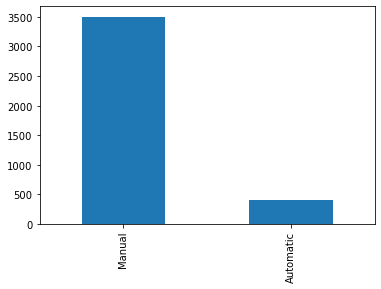

In [14]:
df['Transmission type'].value_counts().plot.bar() 

Most of the cars are Manual transmission.

In [15]:
df['Year'] = df.Name.str[:4] # Extracting year from name, and storing it as integer
df['Year'] = df['Year'].astype(int)

In [16]:
df.Name = df.Name.str[4:] # Slicing the name so that it doesn't contain the year

In [17]:
df.Mileage = df.Mileage.str[:-3] # Removing ' km' form end of Mileage and converting it to integer
df['Mileage'] = df['Mileage'].astype(int)

In [18]:
df.Price = df.Price.str[1:] # Removing the rupee symbol '₹' from price, and changing type to integer
df ['Price'] = df['Price'].astype(int)

In [19]:
df['Manufacturer'] = df['Name'].str.split(' ').str[1] # Removing white space, and separating Manufacturer name form car name
df['Model'] = df['Name'].str.split(' ').str[2]

In [20]:
#Checking if all the above operations worked fine
df.head() 

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price,Year,Manufacturer,Model
0,Toyota Etios,Manual,CROSS 1.4 GD,80605,1st Owner,Diesel,Rohtak,401599,2015,Toyota,Etios
1,Honda Amaze,Manual,1.5 SMT I DTEC,82877,3rd Owner,Diesel,Rohtak,281899,2013,Honda,Amaze
2,Maruti Swift,Manual,VXI,46758,1st Owner,Petrol,Rohtak,478599,2017,Maruti,Swift
3,Skoda Rapid,Automatic,1.5 TDI AT STYLE PLUS,138467,1st Owner,Diesel,Rohtak,610599,2017,Skoda,Rapid
4,Maruti Baleno,Manual,ZETA 1.2 K12,9483,2nd Owner,Petrol,Rohtak,615199,2018,Maruti,Baleno


In [21]:
df['Transmission type'].value_counts() # Value counts of transmission

Manual       3506
Automatic     393
Name: Transmission type, dtype: int64

In [22]:
df['Owned'].value_counts() # Value counts of Owned

1st Owner    3318
2nd Owner     588
3rd Owner      90
5th Owner       3
4th Owner       1
Name: Owned, dtype: int64

In [23]:
df['Fuel type'].value_counts() # Value counts of Fuel type

Petrol          2812
Diesel          1144
Petrol + CNG      42
Petrol + LPG       2
Name: Fuel type, dtype: int64

In [24]:
df['City'].value_counts() # Value counts of City

Ahmedabad     310
Pune          300
Surat         280
Chennai       273
Rohtak        272
Bengaluru     260
Meerut        257
Rajkot        248
Kolkata       218
Jaipur        217
Mysore        210
Panipat       200
Mumbai        200
Ludhiana      180
Chandigarh    180
Delhi         180
Nasik         100
Hyderabad      88
Bhopal         27
Name: City, dtype: int64

In [25]:
df.describe() # Cheking some basic stats about our data

,Mileage,Price,Year
count,4.000000e+03,4.000000e+03,4000.00000
mean,4.587842e+04,5.695933e+05,2016.60025
std,4.166431e+04,2.874513e+05,2.43124
min,3.500000e+02,1.263990e+05,2008.00000
25%,1.834600e+04,3.837490e+05,2015.00000
50%,3.600200e+04,4.987990e+05,2017.00000
75%,6.368475e+04,6.670240e+05,2018.00000
max,1.002408e+06,2.938999e+06,2021.00000


Minimum Mileage 350 km;
Maximum Mileage 1,000,000 km

Oldest car: 2008;
Newest car: 2021

Minimum price: Rs. 126,000;
Maximum price of car: Rs. 29,380,000

#### EDA

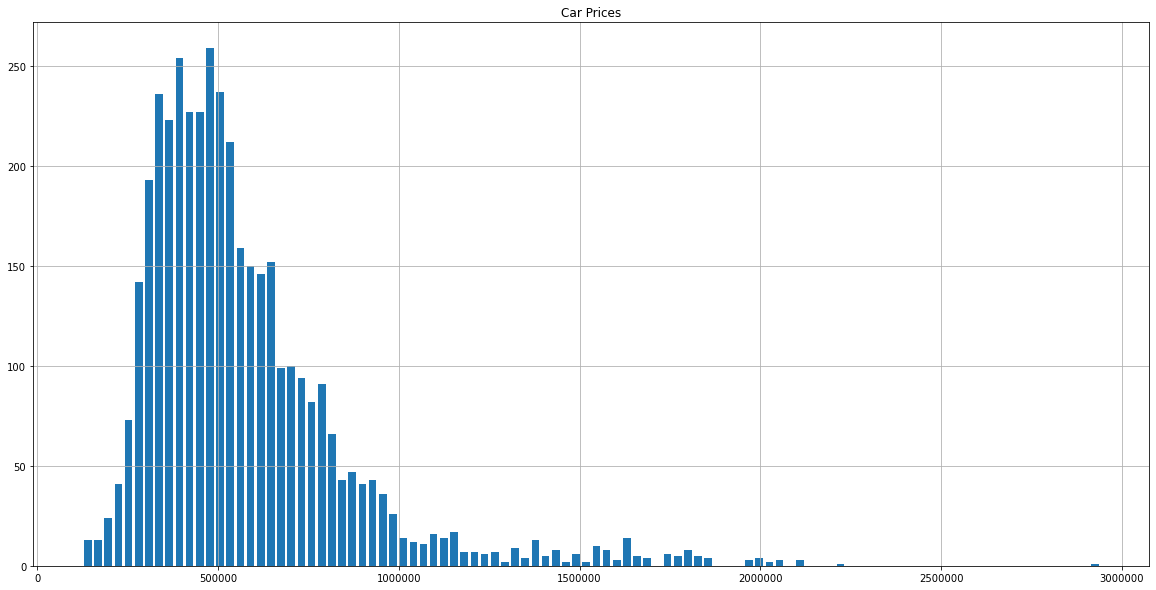

In [26]:
# Looking at distribution of selling price of car, which is our target variable.
# We can observe that the distribution is right skewed

df['Price'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Car Prices')
plt.show()

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

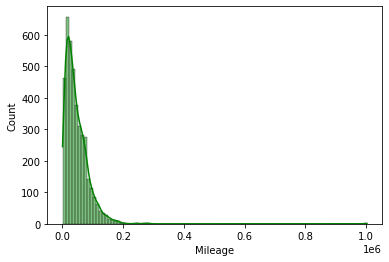

In [27]:
sns.histplot(df['Mileage'],bins = 100 , kde = True, color = 'green') # Most of the mileage of cars is less that 200,000 km

<AxesSubplot:xlabel='Year', ylabel='Count'>

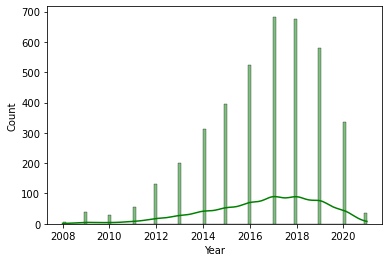

In [28]:
sns.histplot(df['Year'],bins = 100 , kde = True, color = 'green') # Most of the flight prices range from 2000-20000

We can see that most of the cars in this data were bought between 2015 and 2020

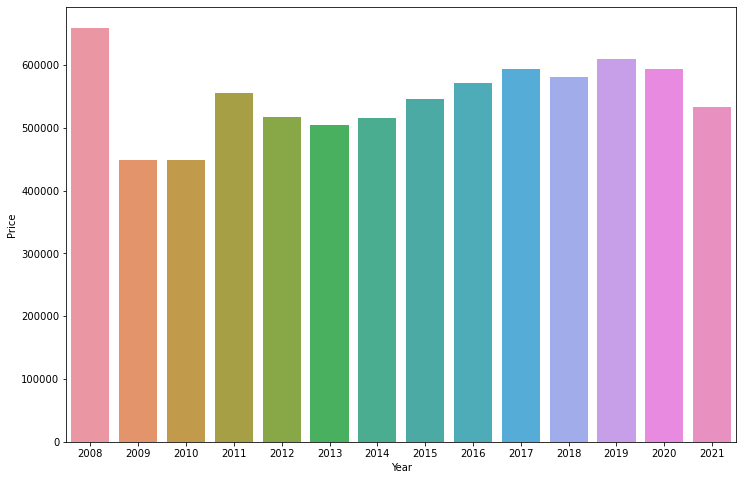

In [29]:
df_2 = df.groupby('Year').mean()
df_2.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='Price', data=df_2,ax=ax);

Average price of car vs year; we can see the average price of car increases if the car is not very old.

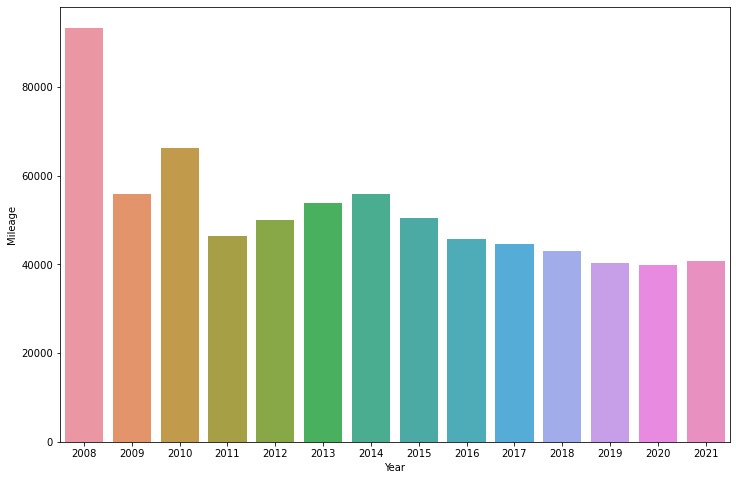

In [30]:
df_2 = df.groupby('Year').mean()
df_2.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='Mileage', data=df_2,ax=ax);

Average mileage in km on a car, based on the year the car was manufactured; we can observe that the mileage is more for older cars; as expected.

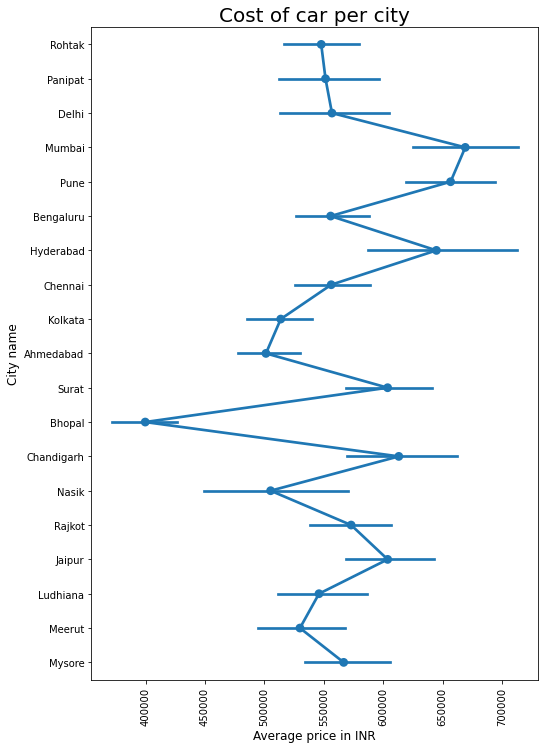

In [31]:
f,ax1 = plt.subplots(figsize = (8,12))
sns.pointplot(y = df.City, x = df['Price'], join=True, data= df )
plt.xticks(rotation = 90)
plt.title("Cost of car per city",{'fontsize':20})
plt.xlabel('Average price in INR',{'fontsize' : 'large'})
plt.ylabel('City name',{'fontsize':'large'})
plt.show()

Average price of car according to city in which it was listed. Bhopal has the most expensive cars and Kochi has the least expensive cars.

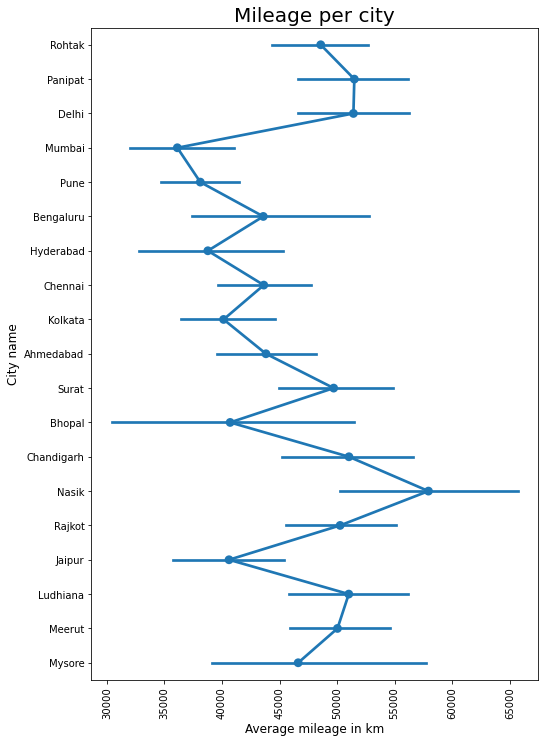

In [32]:
f,ax1 = plt.subplots(figsize = (8,12))
sns.pointplot(y = df.City, x = df['Mileage'], join=True, data= df )
plt.xticks(rotation = 90)
plt.title("Mileage per city",{'fontsize':20})
plt.xlabel('Average mileage in km',{'fontsize' : 'large'})
plt.ylabel('City name',{'fontsize':'large'})
plt.show()

Average mileage of car (in km) according to city in which it was listed. Ludhiiana has the most driven cars and Mysore has the least driven cars.

Checking the data for some cars

In [33]:
df[['Mileage']].idxmax() # Which df index has maximum mileage

Mileage    1249
dtype: int64

In [34]:
df.iloc[1879] # This car has max mileage

Name                  Maruti Swift
Transmission type           Manual
Variant                       VXI 
Mileage                      23431
Owned                    1st Owner
Fuel type                   Petrol
City                       Kolkata
Price                       485999
Year                          2018
Manufacturer                Maruti
Model                        Swift
Name: 1879, dtype: object

In [35]:
df[['Price']].idxmax() # Which df index has maximum price

Price    1512
dtype: int64

In [36]:
df.iloc[2007] # This car has max price

Name                        Maruti S Cross
Transmission type                   Manual
Variant              MAGNA 1.2 KAPPA VTVT 
Mileage                              38536
Owned                            2nd Owner
Fuel type                           Petrol
City                             Ahmedabad
Price                               393799
Year                                  2016
Manufacturer                        Maruti
Model                                    S
Name: 2007, dtype: object

In [37]:
df[['Price']].idxmin() # Which df index has minimum price

Price    118
dtype: int64

In [38]:
df.iloc[92] # This car has min price

Name                  Maruti Swift Dzire
Transmission type                 Manual
Variant                       VDI BS IV 
Mileage                            49310
Owned                          1st Owner
Fuel type                         Diesel
City                              Rohtak
Price                             368699
Year                                2012
Manufacturer                      Maruti
Model                              Swift
Name: 92, dtype: object

In [39]:
df[['Mileage']].idxmin() # Which df index has minimum mileage

Mileage    1432
dtype: int64

In [40]:
df.iloc[2059] # This car has min mileage

Name                  Maruti Swift
Transmission type           Manual
Variant                       LXI 
Mileage                       5656
Owned                    1st Owner
Fuel type                   Petrol
City                     Ahmedabad
Price                       311199
Year                          2015
Manufacturer                Maruti
Model                        Swift
Name: 2059, dtype: object

#### Pre-processing data

In [41]:
df.nunique() # Now to simplify the data

Name                  115
Transmission type       2
Variant               517
Mileage              2385
Owned                   5
Fuel type               4
City                   19
Price                2064
Year                   14
Manufacturer           23
Model                  97
dtype: int64

In [42]:
df['Manufacturer'].value_counts() # We have a lot of manufacturers

Maruti        2164
Hyundai        868
Ford           217
Honda          213
Toyota         110
Renault         93
Volkswagen      81
Tata            67
Mahindra        41
KIA             30
MG              26
Datsun          22
Skoda           16
Jeep            11
BMW             11
Nissan           8
Audi             7
Mercedes         4
HYUNDAI          4
Chevrolet        2
Ssangyong        2
RENAULT          2
Fiat             1
Name: Manufacturer, dtype: int64

Now I will simplify the engine size and convert it to a range, I will also convert various variants of engine to get a better description.

In [43]:
df.loc[df['Variant'].str.contains('LXI', case=False), 'Variant'] = 'Basic Petrol'
df.loc[df['Variant'].str.contains('VXI', case=False), 'Variant'] = 'Middle Petrol'
df.loc[df['Variant'].str.contains('ZXI', case=False), 'Variant'] = 'Top Petrol'

df.loc[df['Variant'].str.contains('VDI', case=False), 'Variant'] = 'Basic Diesel'
df.loc[df['Variant'].str.contains('VDI', case=False), 'Variant'] = 'Middle Diesel'
df.loc[df['Variant'].str.contains('ZDI', case=False), 'Variant'] = 'Top Diesel'

df.loc[df['Variant'].str.contains('LUXURY', case=False), 'Variant'] = 'Luxury'

df.loc[df['Variant'].str.contains('1.0', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.1', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.2', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.3', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.4', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.5', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.6', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.7', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.8', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.9', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('2.0', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('2.1', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.2', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.3', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.4', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.5', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.6', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.7', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.8', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.9', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.0', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.1', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.2', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.3', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.4', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.5', case=False), 'Variant'] = '2.0+ Liter'

df.loc[df['Variant'].str.contains('5 STR WITH AC PLUSHTR', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('RXL', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('V MT PETROL', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('ERA PLUS', case=False), 'Variant'] = '1.0-1.5 Liter'

In [44]:
df.loc[df.groupby('Variant').Variant.transform('count').lt(20), 'Variant'] = 'Other' 

# Combining variants as Other which have less than 20 value counts to simplify the data

In [45]:
df['Variant'].value_counts()

1.0-1.5 Liter    1685
Middle Petrol     774
Basic Diesel      348
Other             342
Basic Petrol      313
1.5-2.0 Liter     181
Top Diesel        156
Top Petrol        127
2.0+ Liter         74
Name: Variant, dtype: int64

In [46]:
df['Model'].value_counts() # We have 100 different car models

Alto       499
Swift      456
Grand      204
Baleno     199
Elite      189
          ... 
Jetta        1
Mobilio      1
Lodgy        1
KUV          1
Linea        1
Name: Model, Length: 97, dtype: int64

In [47]:
df['Name'].value_counts() # We have 115 different names

 Maruti Swift               342
 Hyundai Grand i10          204
 Maruti Alto 800            200
 Maruti Baleno              199
 Hyundai Elite i20          189
                           ... 
 Mercedes Benz CLS Class      1
 Mercedes Benz C Class        1
 Honda Mobilio                1
 Volkswagen Jetta             1
 Renault Captur               1
Name: Name, Length: 115, dtype: int64

In [48]:
df.drop(['Name'], axis = 1, inplace = True) # Dropping the name columns as I have already separated it into 'Name' and 'Model'

### EDA

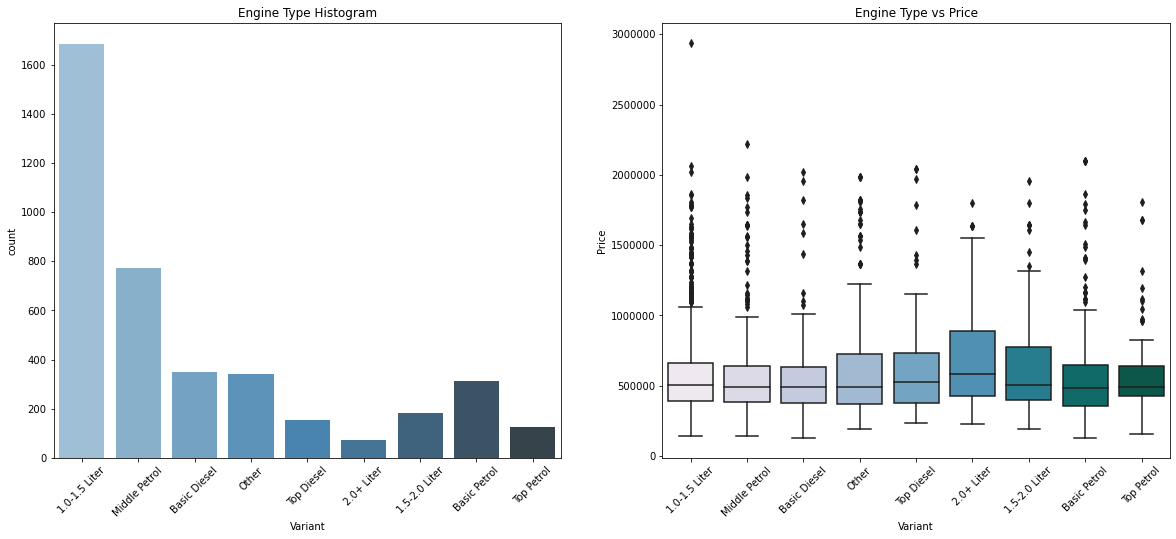

In [49]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
plt.xticks(rotation=45)
sns.countplot(df.Variant, palette=("Blues_d"))
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.Variant, y=df.Price, palette=("PuBuGn"))

plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Count plot and price plot according to the cars engine variant

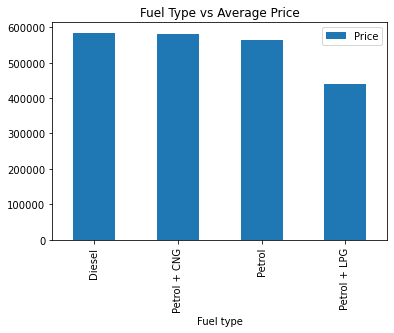

In [50]:
df_fuel = pd.DataFrame(df.groupby(['Fuel type'])['Price'].mean().sort_values(ascending = False))
df_fuel.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Fuel Type vs Average Price')
plt.show()

Average price of car with respect to the fuel type. Diesel is most evpensive, then petrol, least expensive is Petrol + LPG

In [51]:
df.head()

,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price,Year,Manufacturer,Model
0,Manual,1.0-1.5 Liter,80605,1st Owner,Diesel,Rohtak,401599,2015,Toyota,Etios
1,Manual,1.0-1.5 Liter,82877,3rd Owner,Diesel,Rohtak,281899,2013,Honda,Amaze
2,Manual,Middle Petrol,46758,1st Owner,Petrol,Rohtak,478599,2017,Maruti,Swift
3,Automatic,1.0-1.5 Liter,138467,1st Owner,Diesel,Rohtak,610599,2017,Skoda,Rapid
4,Manual,1.0-1.5 Liter,9483,2nd Owner,Petrol,Rohtak,615199,2018,Maruti,Baleno


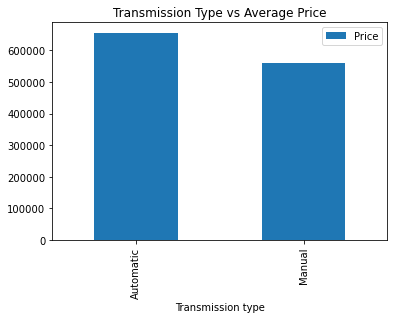

In [52]:
df_trans = pd.DataFrame(df.groupby(['Transmission type'])['Price'].mean().sort_values(ascending = False))
df_trans.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Transmission Type vs Average Price')
plt.show()

As expected cars which have automatic transmission are on average priced above Rs. 80,000 and cars which have manual transmission are on average price around Rs 50,000

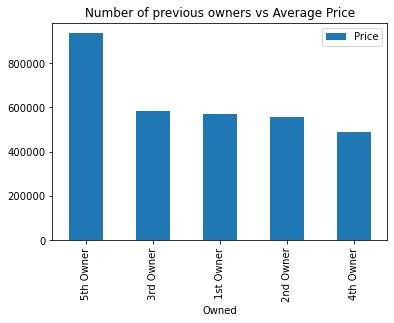

In [53]:
df_ownd = pd.DataFrame(df.groupby(['Owned'])['Price'].mean().sort_values(ascending = False))
df_ownd.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of previous owners vs Average Price')
plt.show()

We can observe that as number of owners go up, the average price of car decreases, this is what one would expect.

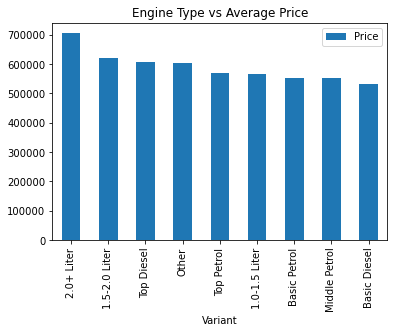

In [54]:
df_vrnt = pd.DataFrame(df.groupby(['Variant'])['Price'].mean().sort_values(ascending = False))
df_vrnt.plot.bar()

plt.title('Engine Type vs Average Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

We can see that 2 liter engine is the most common engine size.

#### Multi variate analysis

<Figure size 1080x1080 with 0 Axes>

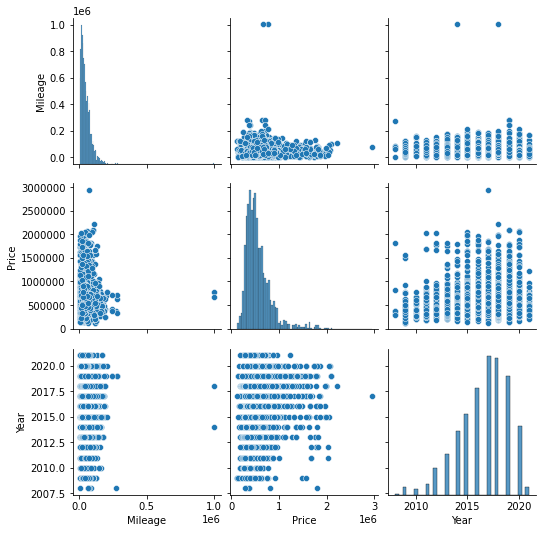

In [55]:
plt.figure(figsize=(15,15))
sns.pairplot(df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

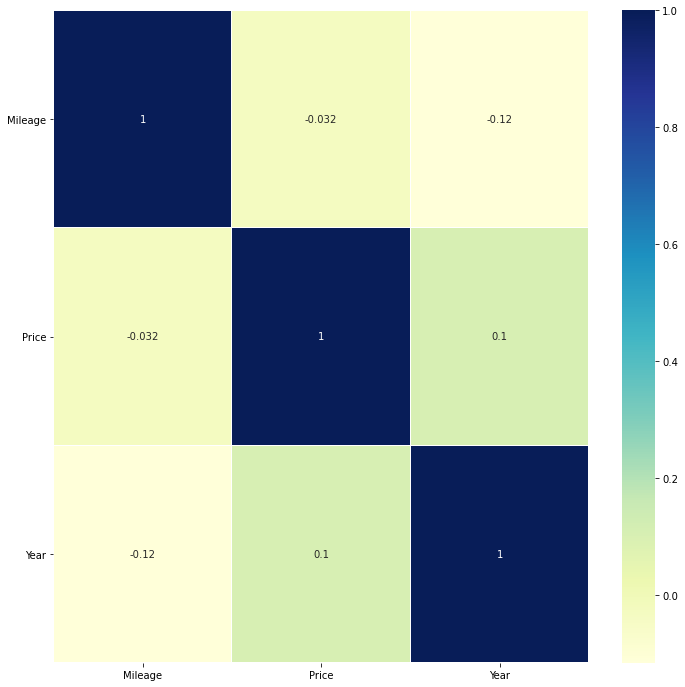

In [56]:
plt.figure(figsize=(12,12)) # Co-relation heat map
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0); # Checkign co-relation

In [57]:
df.loc[df.groupby('Model').Variant.transform('count').lt(20), 'Variant'] = 'Other'  
# If less that 20 count, Model is renamed to 'Other'

In [58]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df

df = dummies('Transmission type',df)
df = dummies('Variant',df)
df = dummies('Owned',df)
df = dummies('Fuel type',df)
df = dummies('City',df)
df = dummies('Manufacturer',df)
df = dummies('Model',df)

In [59]:
df.head() # Dummy variables have been created

,Mileage,Price,Year,Manual,1.5-2.0 Liter,2.0+ Liter,Basic Diesel,Basic Petrol,Middle Petrol,Other,Top Diesel,Top Petrol,2nd Owner,3rd Owner,4th Owner,5th Owner,Petrol,Petrol + CNG,Petrol + LPG,Bengaluru,Bhopal,Chandigarh,Chennai,Delhi,Hyderabad,Jaipur,Kolkata,Ludhiana,Meerut,Mumbai,Mysore,Nasik,Panipat,Pune,Rajkot,Rohtak,Surat,BMW,Chevrolet,Datsun,Fiat,Ford,HYUNDAI,Honda,Hyundai,Jeep,KIA,MG,Mahindra,Maruti,Mercedes,Nissan,RENAULT,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,5,A3,ALTROZ,AURA,Alto,Amaze,Ameo,BR-V,Baleno,Beat,Benz,Bolero,Brio,CRV,Camry,Captur,Celerio,Ciaz,City,Civic,Compass,Corolla,Creta,Duster,Dzire,Ecosport,Eeco,Elite,Endeavour,Eon,Ertiga,Etios,FREESTYLE,Figo,Fortuner,GRAND,Glanza,Go,Grand,HECTOR,Harrier,Hexa,IGNIS,Indica,Innova,Jazz,Jetta,KAROQ,KUV,Kiger,Kuv100,Kwid,Linea,Lodgy,Micra,Mobilio,NEW,NEXON,Nano,New,OMNI,Octavia,Polo,Rapid,Redi,Rexton,Ritz,S,SELTOS,Santro,Scorpio,Sunny,Superb,Swift,TIGOR,TRIBER,TUV300,Terrano,Thar,Tiago,Tucson,VENUE,Vento,Verna,Vitara,WR-V,Wagon,X1,XL6,XUV,XUV500,Xcent,YARIS,Zen,i10,i20
0,80605,401599,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,82877,281899,2013,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46758,478599,2017,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,138467,610599,2017,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9483,615199,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df.shape # We have 5339 rows, and 157 coulmns after creating dummy variables

(4000, 155)

Skew of Pirce: 2.1661814876951664


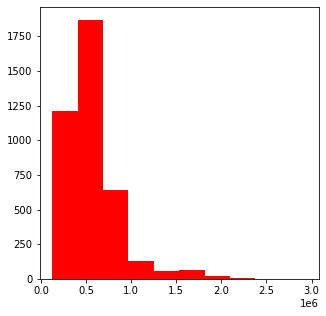

In [61]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Pirce:", df.Price.skew())
plt.hist(df.Price,  color='red')
plt.show() # Checking skew of target variable

Skew of Log-Transformed Price: 0.4072452747180472


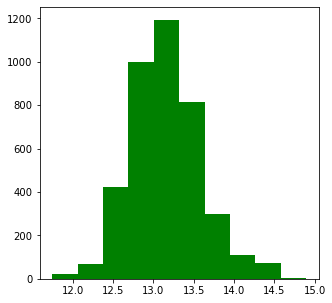

In [62]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Price:", np.log1p(df.Price).skew())
plt.hist(np.log1p(df.Price), color='green')
plt.show() # Fixing the skew by taking log

Skew of Mileage 6.976083944496797


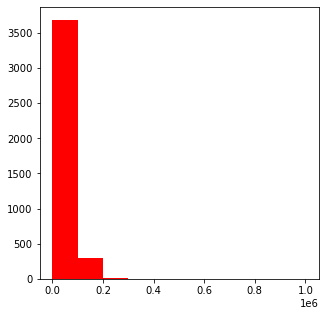

In [63]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Mileage", df.Mileage.skew())
plt.hist(df.Mileage,  color='red')
plt.show() # Checking skew of variable

Skew of Log-Transformed Mileage -0.8403177869701066


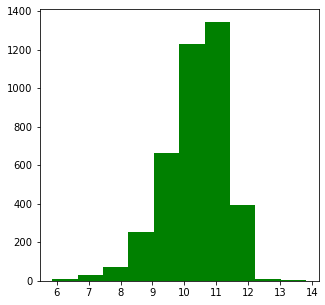

In [64]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Mileage", np.log1p(df.Mileage).skew())
plt.hist(np.log1p(df.Mileage), color='green')
plt.show() # Reducting the skew by taking log

### Model building phase

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics as sm
from math import e
# Importing useful libraries

In [66]:
df.head()

,Mileage,Price,Year,Manual,1.5-2.0 Liter,2.0+ Liter,Basic Diesel,Basic Petrol,Middle Petrol,Other,Top Diesel,Top Petrol,2nd Owner,3rd Owner,4th Owner,5th Owner,Petrol,Petrol + CNG,Petrol + LPG,Bengaluru,Bhopal,Chandigarh,Chennai,Delhi,Hyderabad,Jaipur,Kolkata,Ludhiana,Meerut,Mumbai,Mysore,Nasik,Panipat,Pune,Rajkot,Rohtak,Surat,BMW,Chevrolet,Datsun,Fiat,Ford,HYUNDAI,Honda,Hyundai,Jeep,KIA,MG,Mahindra,Maruti,Mercedes,Nissan,RENAULT,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,5,A3,ALTROZ,AURA,Alto,Amaze,Ameo,BR-V,Baleno,Beat,Benz,Bolero,Brio,CRV,Camry,Captur,Celerio,Ciaz,City,Civic,Compass,Corolla,Creta,Duster,Dzire,Ecosport,Eeco,Elite,Endeavour,Eon,Ertiga,Etios,FREESTYLE,Figo,Fortuner,GRAND,Glanza,Go,Grand,HECTOR,Harrier,Hexa,IGNIS,Indica,Innova,Jazz,Jetta,KAROQ,KUV,Kiger,Kuv100,Kwid,Linea,Lodgy,Micra,Mobilio,NEW,NEXON,Nano,New,OMNI,Octavia,Polo,Rapid,Redi,Rexton,Ritz,S,SELTOS,Santro,Scorpio,Sunny,Superb,Swift,TIGOR,TRIBER,TUV300,Terrano,Thar,Tiago,Tucson,VENUE,Vento,Verna,Vitara,WR-V,Wagon,X1,XL6,XUV,XUV500,Xcent,YARIS,Zen,i10,i20
0,80605,401599,2015,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,82877,281899,2013,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46758,478599,2017,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,138467,610599,2017,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9483,615199,2018,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
X=df.drop(['Price'], axis = 1, inplace = False) # Training variables
y=df['Price'] # Testing variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (3200, 154)
Y Train Shape  (3200,)
X Test Shape  (800, 154)
Y Test Shape  (800,)


### Decision tree regressor

In [68]:
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

-0.47752489959821665

In [69]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

-0.7243264760192942


In [70]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 229029.14
Mean squared error = 126130807348.15
Median absolute error = 148250.0
Explain variance score = -0.47
R2 score = -0.48


### Random forest regression

In [71]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.022271098377668275

In [72]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

-0.09671987803668716


In [73]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 187823.23
Mean squared error = 83465081206.27
Median absolute error = 121359.5
Explain variance score = 0.02
R2 score = 0.02


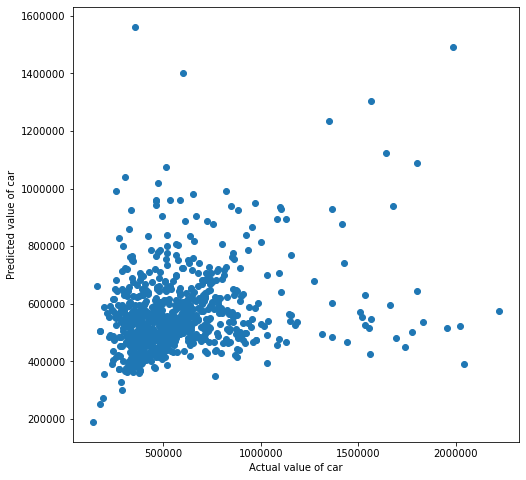

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred_rfr)
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:xlabel='Price', ylabel='Density'>

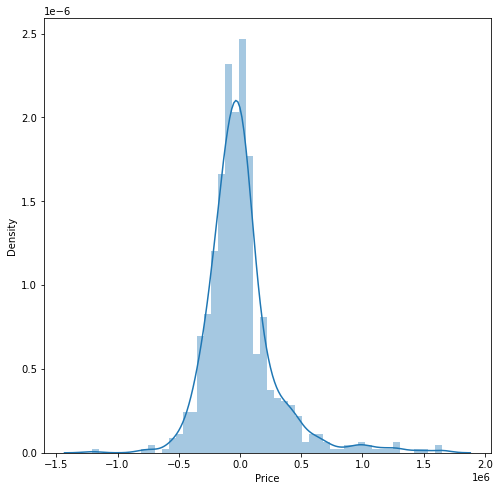

In [75]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-y_pred_rfr)

## Taking log of Price, Mileage and min-max of year data 

In [76]:
df['Price'] = np.log(df['Price'])
df['Mileage'] = np.log(df['Mileage'])
df['Year']=(df['Year']-df['Year'].min())/(df['Year'].max()-df['Year'].min())

In [77]:
X=df.drop(['Price'], axis = 1, inplace = False)
y=df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (3200, 154)
Y Train Shape  (3200,)
X Test Shape  (800, 154)
Y Test Shape  (800,)


### Random forest regression 

In [78]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.05886275261424612

In [79]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

-0.12441105027298469


### Decision tree regressor 

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

-0.6770098718114756

In [81]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

-0.9419141063226735


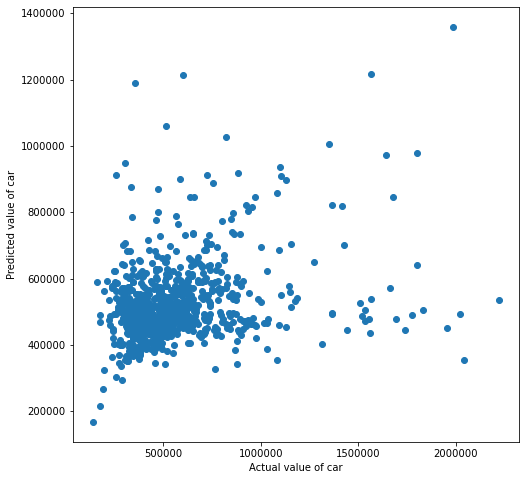

In [82]:
plt.figure(figsize=(8,8)) # Scatter plot of predicted vs actual values
plt.scatter(e**(y_test),e**(y_pred_rfr))
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:xlabel='Price', ylabel='Density'>

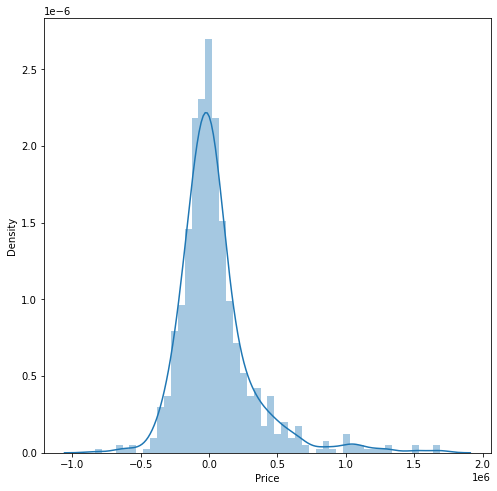

In [83]:
plt.figure(figsize=(8,8))
sns.distplot(e**y_test-e**y_pred_rfr) # As I took log before, re-converting the values to real prices

### Support vector regression

In [84]:
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

0.062372455247162284

In [85]:
scr = cross_val_score(svr, X,y, cv=5)
print(scr.mean())

-0.09713647321840098


### Hyper paramter tuning

I will be performing hyper parameter tuning on the random forest regressor model, as it gave the best performance.

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [88]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [ ]:
GCV.fit(X_train,y_train)

In [ ]:
GCV.best_params_

Training model according to the best parameters

In [ ]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =2, n_estimators = 150, criterion='mse')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

In [ ]:
scr = cross_val_score(mod, X,y, cv=4)
print(scr.mean())

As we can observe hyper parameter tuning improved the r^2 score to 0.943 which is good.

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(e**y_test,e**pred)
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

Scatter plot of predicted vs actual values, we can se ethat there are some outliers, but most of the values lie in a stright line at 45deg which is optimal. 

We also got a much tighter fir near 0 deviation which means our model is performing well.

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(e**y_test-e**pred) # As I took log before, re-converting the values to real prices

#### Checking the Concordance index

In [ ]:
from lifelines.utils import concordance_index
print(f'Concordance index: {concordance_index(y_test, pred)}')

We got Concordance index: 0.9487433647587257, which is a very good value. and it mease that the model is performing great.

### Saving the model

In [ ]:
import joblib
joblib.dump(mod,"CarPricePred.pkl")